In [1]:
# Author: Roi Yehoshua <roiyeho@gmail.com>
# License: MIT

import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)

In [2]:
def make_data(n=50):
    rng = np.random.RandomState(0)
    X = rng.rand(n, 1) * 10
    err = rng.normal(size=n) * 0.3
    y = np.sin(X).ravel() + err
    return X, y

In [3]:
def plot_data(X, y):
    plt.scatter(X, y, color='k')
    plt.xlabel('$x$')
    plt.ylabel('$y$')

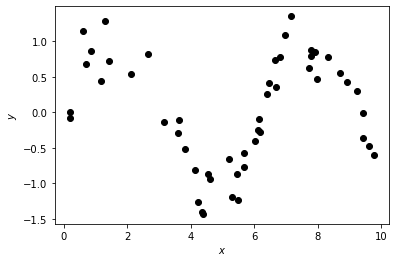

In [4]:
X, y = make_data(50)
plot_data(X, y)
plt.savefig('figures/sin_data.pdf')

In [5]:
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import ElasticNet
from sklearn.pipeline import Pipeline

def ElasticNetPolynomialRegression(degree=10, alpha=1, l1_ratio=0.5):
    return Pipeline([('scaler', StandardScaler()),
                     ('polyfeatures', PolynomialFeatures(degree)),
                     ('elastic_net', ElasticNet(alpha=alpha, l1_ratio=l1_ratio))])

C:\Users\roi_y\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.007e+01, tolerance: 2.851e-03 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
C:\Users\roi_y\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.681e-02, tolerance: 2.851e-03
  model = cd_fast.enet_coordinate_descent(
C:\Users\roi_y\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning:

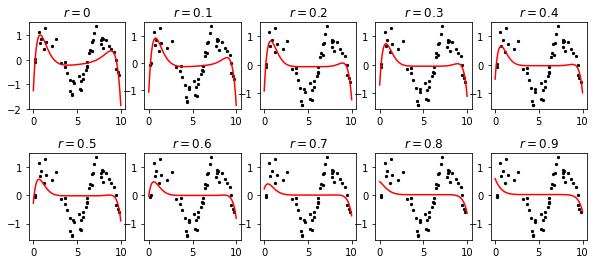

In [6]:
X_test = np.linspace(0, 10, 100).reshape(-1, 1)
fig, axes = plt.subplots(2, 5, figsize=(10, 4))
plt.subplots_adjust(hspace=0.5)
l1_ratio = 0

for ax in axes.flat:
    reg = ElasticNetPolynomialRegression(alpha=1, l1_ratio=l1_ratio)
    reg.fit(X, y)
    y_test = reg.predict(X_test)
    ax.plot(X_test, y_test, color='r')
    ax.set_title(f'$r = ${round(l1_ratio, 1)}')
    ax.scatter(X, y, color='k', s=5)
    l1_ratio += 0.1

plt.savefig('figures/elastic_net.pdf')